In [1]:
## importing libraries

import tensorflow as tf 
from tensorflow import keras

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
## using the built in keras fashion mnist dataset

fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [5]:
##  10 different classes in the dataset

class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneakers','Bag','Ankle Boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:

len(test_labels)

10000

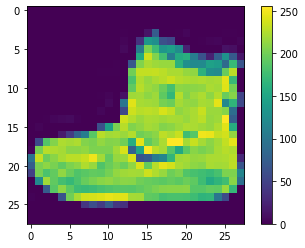

In [10]:
# plotting a sample figure from the dataset 
#color bar added 

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
## scaling the image betn 0-1

train_images = train_images / 255.0
test_images = test_images/ 255.0

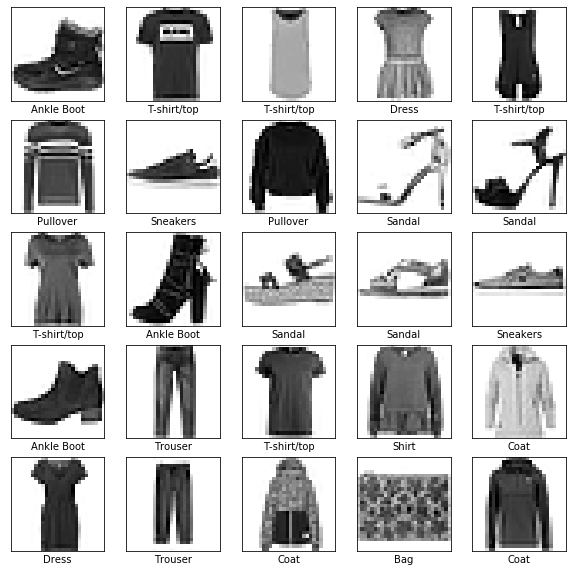

In [12]:
## plotting first 25 images from train set

plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
## creating a sequential model 
# first layer is used to flatten the input image thus changing its shape from 2d matrix(28,28) to 1d matrix(784,1)
#second and third are both dense layers
# output layer has softmax as activation thus it produces different scores for all 10 classes adding up to 1
# (node with the highest score is the correct class)
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(128,activation = tf.nn.relu),
    keras.layers.Dense(10,activation = tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [15]:
#50 epoch is too much resulting in overfitting, somewhere around 20 probably yeilds the best result 
model.fit(train_images,train_labels, epochs = 50)

Epoch 1/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.4946 - acc: 0.8256
Epoch 2/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3732 - acc: 0.8646
Epoch 3/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3360 - acc: 0.8773
Epoch 4/50
60000/60000 [==============================] - 3s 46us/sample - loss: 0.3112 - acc: 0.8852
Epoch 5/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2929 - acc: 0.8910
Epoch 6/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2775 - acc: 0.8970
Epoch 7/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2670 - acc: 0.8992
Epoch 8/50
60000/60000 [==============================] - 3s 47us/sample - loss: 0.2559 - acc: 0.9045
Epoch 9/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2469 - acc: 0.9075
Epoch 10/50
60000/60000 [==============================] - 3s 49us/sample - loss: 

In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy : ',test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.4929 - acc: 0.8882
Test Accuracy :  0.8882


In [17]:
predictions = model.predict(test_images)

In [18]:
np.argmax(predictions[0])

9

In [19]:
## image and value array plotting for predictions

def plot_image(i,predictions_array,true_label,img):
    predictions_array,true_label,img = predictions_array[i],true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],100*np.max(predictions_array),class_names[true_label]),color = color)
    
def plot_value_array(i,predictions_array,true_label):
    predictions_array,true_label = predictions_array[i],true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
    

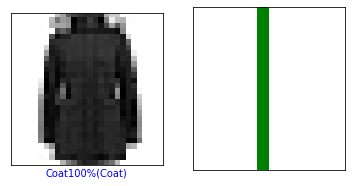

In [28]:
i = 707
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()